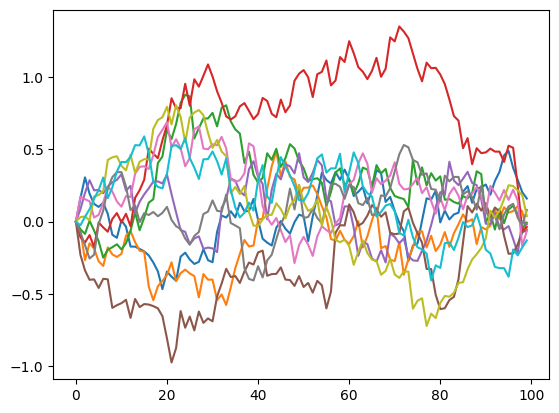

In [11]:

import numpy as np
import matplotlib.pyplot as plt

seed = 1 # initial random seed
N = 100 # number of intervals
M = 10 # number of trials

np.random.seed(seed)

# bridge B(t) is pinned to 0 at t = 0 & t = T via B(t) = W(t)-(t/T) W(T)
# where W(t) is standard model of brownian motion
# the position at next step is determined by interpolating between prior
# position and final position x_i+1 = x_i + sqrt((i/n)*(1-i/n)) * (x_f-x_i)

def generate_bridges(M, N):
    dt = 1.0 / N # step size
    dt_sqrt = np.sqrt(dt) # sqrt(1/N) noise
    B = np.empty((M, N), dtype=np.float32) # array for M trials of N intervals
    B[:, 0] = 0 # initial start

    for n in range(N - 1):
        t = n * dt
        xi = np.random.randn(M) * dt_sqrt
        B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + xi
    return B

B = generate_bridges(M, N)
plt.plot(B.T)
plt.show()